In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

import pandas as pd
import pandas_datareader as web
import numpy as np 
import math 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime 
import re
torch.manual_seed(10)


import os
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

from pylab import rcParams
from plotly import tools

# !pip install chart_studio
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

import statsmodels.api as sm

from numpy.random import normal, seed
from scipy.stats import norm

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

import math
from sklearn.metrics import mean_squared_error
import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

In [54]:
bajaj_finanace=pd.read_csv("BAJAJ_FINANACE.csv", parse_dates=['Date'], index_col=['Date'])
bajaj_finanace.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,5.239737,5.540927,5.239737,5.412679,3.986740,21923.0
2002-07-02,5.523439,5.537041,5.421423,5.443769,4.009641,61044.0
2002-07-03,5.505950,5.545785,5.328151,5.466116,4.026100,34160.0
2002-07-04,5.501093,5.572018,5.417537,5.528297,4.071900,27892.0
2002-07-05,5.563274,5.656546,5.474860,5.590478,4.117700,58976.0


In [56]:
bajaj_finanace.isnull().sum()

Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [57]:
bajaj_finanace.fillna(method='ffill',inplace=True)
   

In [58]:
bajaj_finanace.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
from datetime import date

# DATA from 2002-2023

In [61]:
bajaj_finanace.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5177.000000,5177.000000,5177.000000,5177.000000,5177.000000,5.177000e+03
mean,1305.466547,1323.594635,1285.089250,1304.206245,1295.342487,9.431224e+05
std,2122.574516,2149.235583,2092.234223,2119.917434,2113.821793,1.973256e+06
min,3.673548,4.081612,3.673548,4.064124,2.993455,0.000000e+00
25%,30.337624,31.090599,29.536070,30.284187,27.571733,8.225700e+04
50%,110.699997,113.970001,108.331306,111.364998,107.179543,3.021000e+05
75%,1798.000000,1821.000000,1774.199951,1801.349976,1781.619995,9.843270e+05
max,8050.000000,8050.000000,7861.299805,7929.299805,7900.533203,2.596005e+07


In [8]:
startdate=pd.to_datetime('2002-07-01') 

enddate=pd.to_datetime(date.today())

In [9]:
bajaj_finanace.shape

(5177, 6)

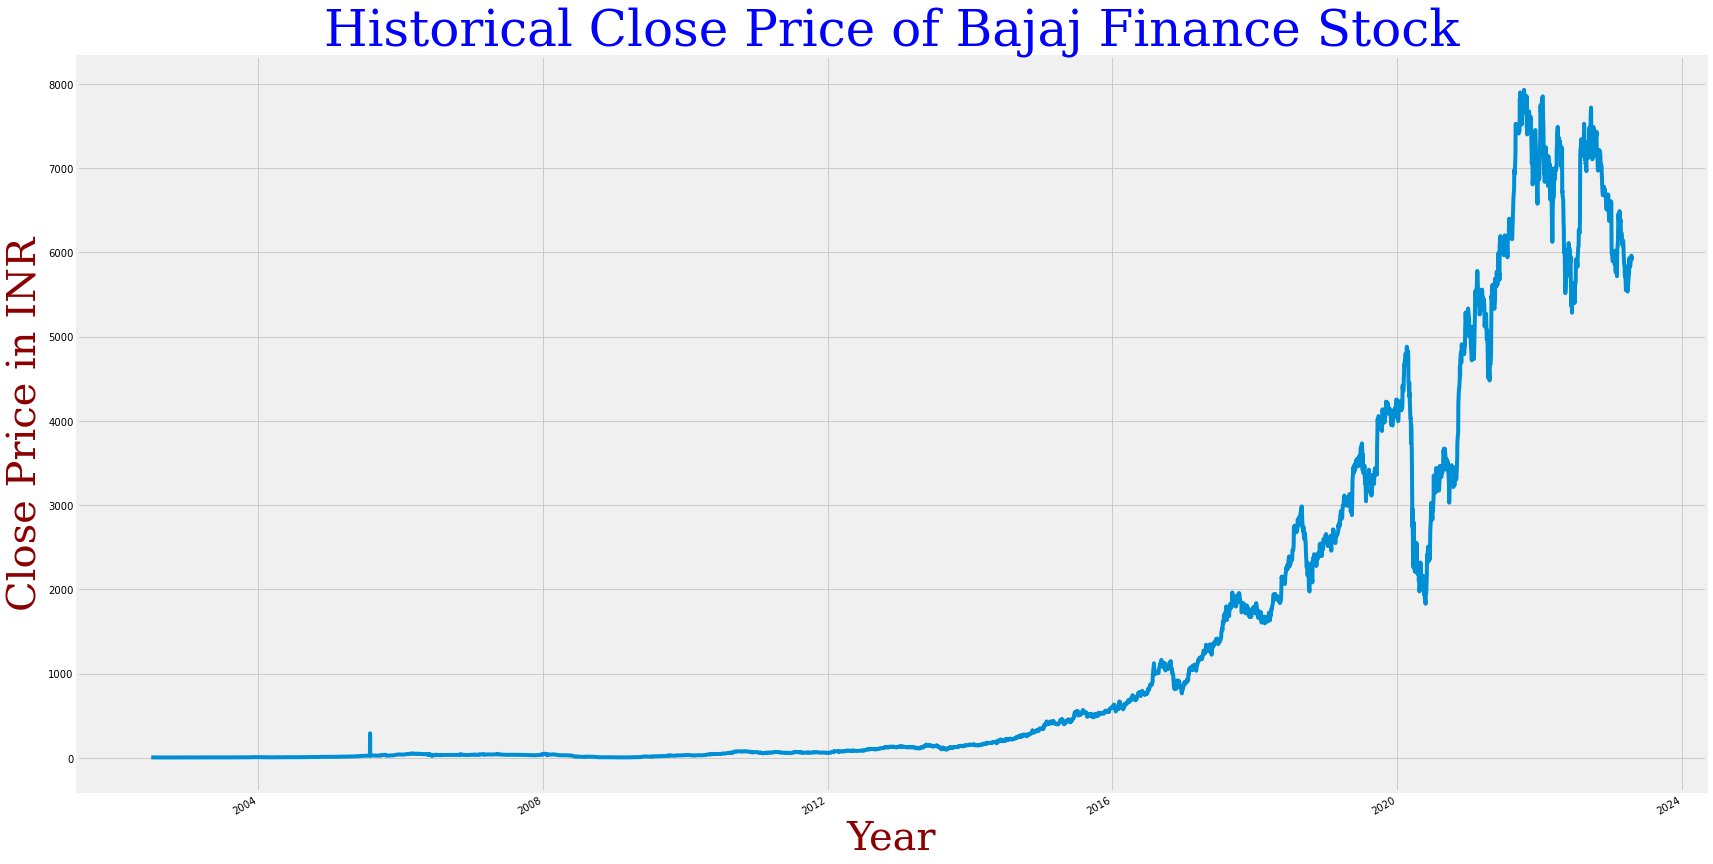

In [10]:
# Visualize the Historical Closing Price

plt.figure(figsize=(26,15))


font1={'family':'serif','color':'blue','size':50}
font2={'family':'serif','color':'darkred','size':40}

plt.title('Historical Close Price of Bajaj Finance Stock',font1)
bajaj_finanace['Close'].interpolate().plot()

plt.xlabel('Year',font2)
plt.ylabel('Close Price in INR',font2)

plt.show()

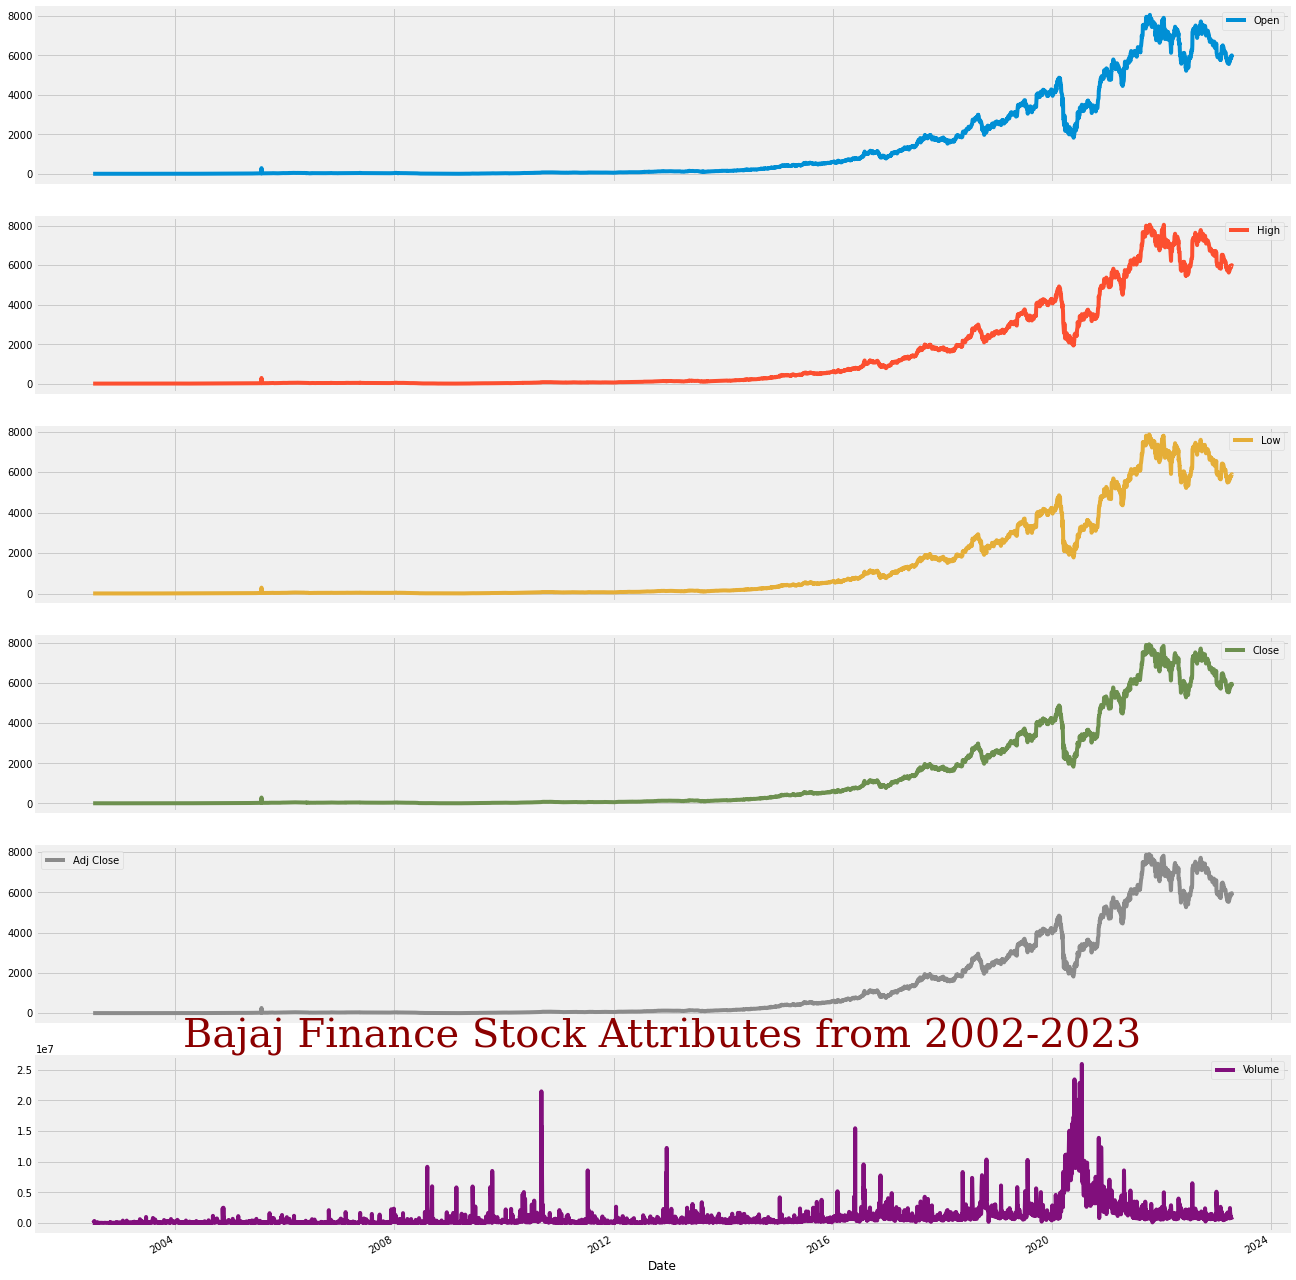

In [11]:
bajaj_finanace["2002":"2023"].plot(subplots=True,figsize=(20,25))
plt.title("Bajaj Finance Stock Attributes from 2002-2023",font2)
plt.savefig('stocks.png')
plt.show()

In [12]:
# bajaj_finanace.tail()

<AxesSubplot:xlabel='Date'>

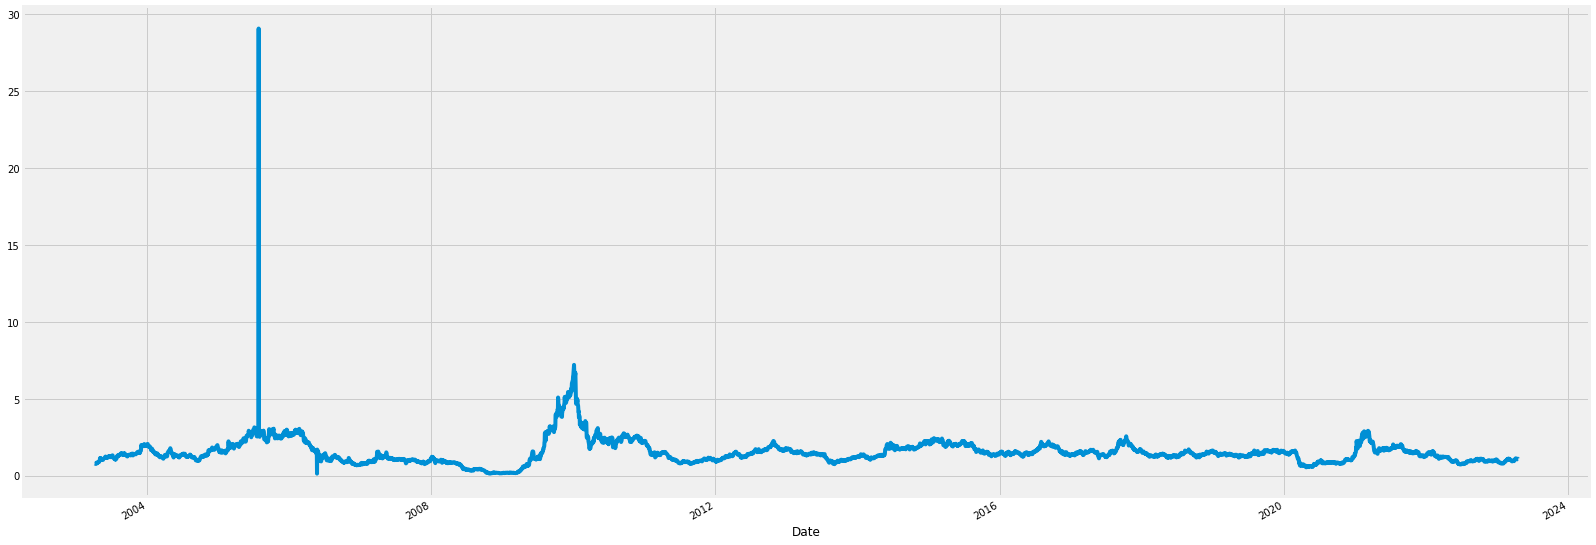

In [14]:
bajaj_finanace['Change']=bajaj_finanace.Close.div(bajaj_finanace.Close.shift(200))# Few values periodically (or aperiodically) tend to be shifted away from the process mean, resulting in outlier values. 
                            # Level shift analysis is generally a part of time series analysis using models like ARIMA.

bajaj_finanace['Change'].plot(figsize=(25,10))

# bajaj_finanace=bajaj_finanace.iloc[200:]


<AxesSubplot:xlabel='Date'>

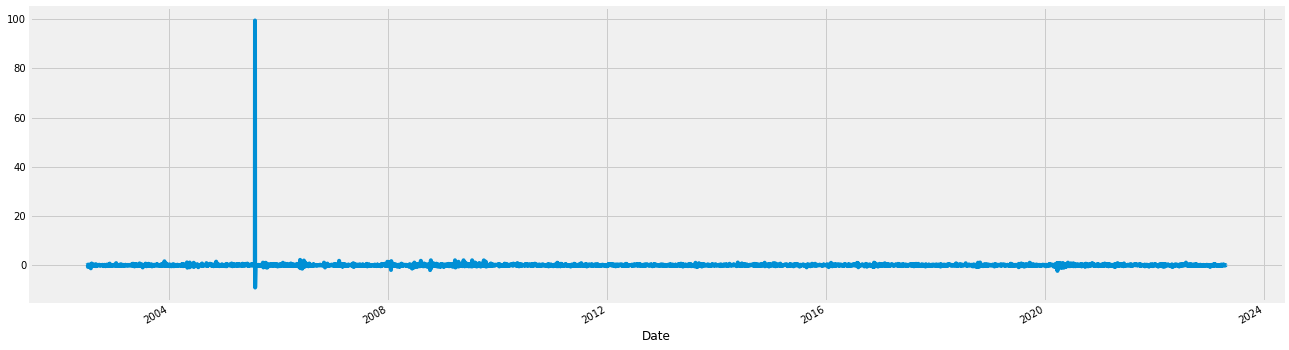

In [17]:
#Second Method to Calculate the returns
bajaj_finanace.Close.pct_change().mul(10).plot(figsize=(20,6))

<function matplotlib.pyplot.show(close=None, block=None)>

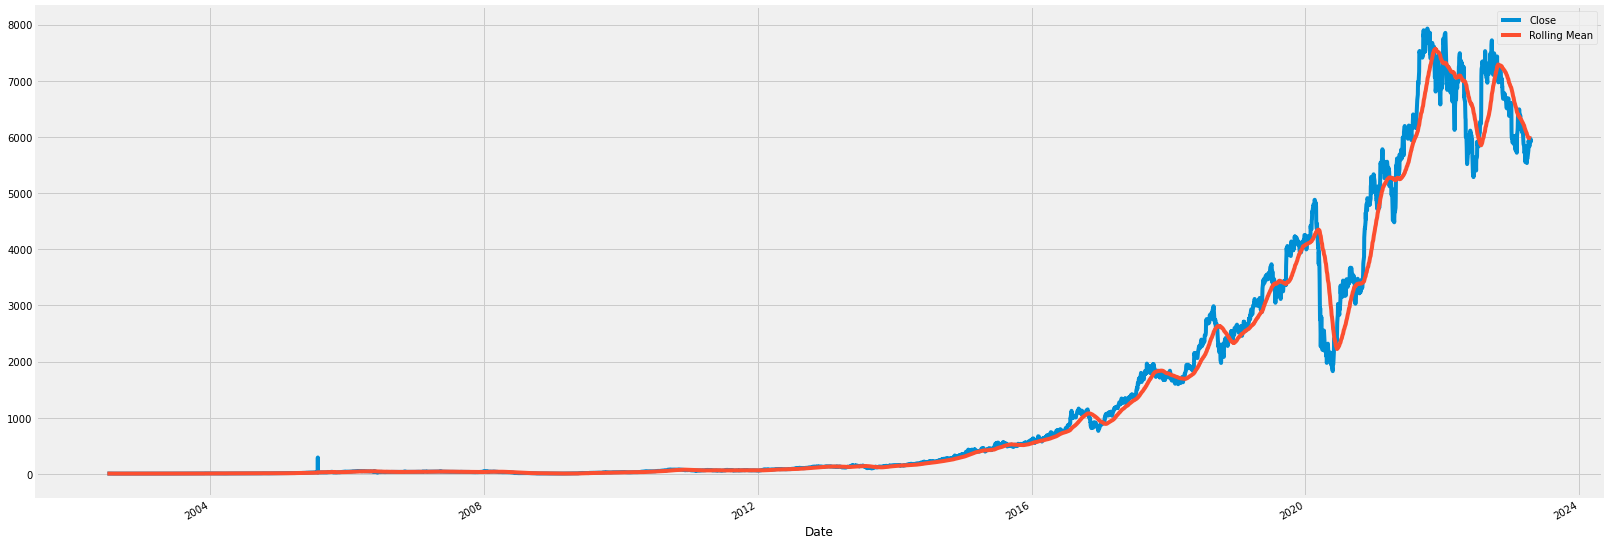

In [18]:
#Rolling Average Plot is Smoother Version of the Original plot

rolling=bajaj_finanace.Close.rolling('90D').mean()
bajaj_finanace.Close.plot(figsize=(25,10))
rolling.plot(figsize=(25,10))
plt.legend(['Close','Rolling Mean'])


plt.show

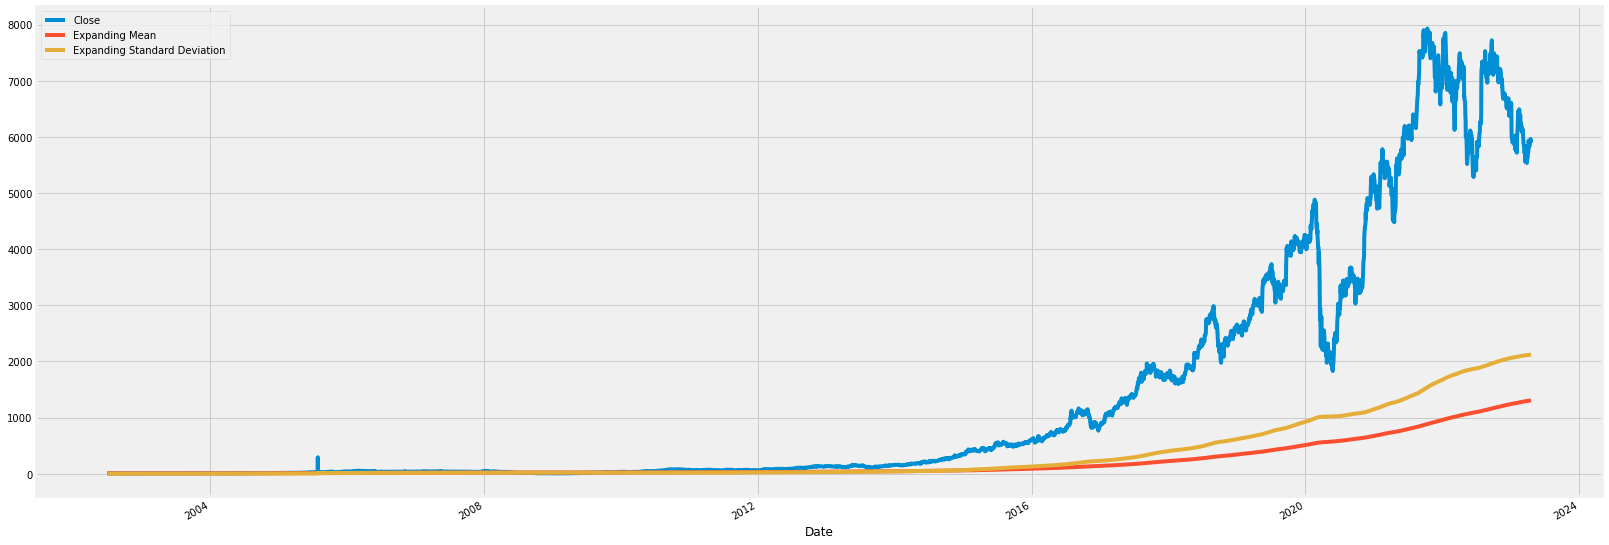

In [19]:
# Expanding Mean and Expanding Standard Deviation
df_mean=bajaj_finanace.Close.expanding().mean()
df_std=bajaj_finanace.Close.expanding().std()

bajaj_finanace.Close.plot(figsize=(25,10))
df_mean.plot(figsize=(25,10))
df_std.plot(figsize=(25,10))

plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.show()

In [20]:
sample=go.Ohlc(x=bajaj_finanace['07-2022'].index,
              open=bajaj_finanace['07-2022'].Open,
              high=bajaj_finanace['07-2022'].High,
              low=bajaj_finanace['07-2022'].Low,
              close=bajaj_finanace['07-2022'].Close)
data=[sample]

In [21]:
bajaj_finanace.tail()

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2023-04-12,5837.000000,5876.75,5786.000000,5856.950195,5856.950195,1023069.0,1.055468
2023-04-13,5856.950195,5937.00,5850.399902,5904.450195,5904.450195,833006.0,1.085457
2023-04-17,5998.000000,5998.00,5900.000000,5961.450195,5961.450195,672857.0,1.094216
2023-04-18,5975.000000,5994.00,5870.250000,5915.649902,5915.649902,640889.0,1.058682
2023-04-19,5915.649902,5960.00,5880.000000,5947.750000,5947.750000,554928.0,1.054341


In [22]:
# OHLC chart of 2022
sample = go.Ohlc(x=bajaj_finanace['2022'].index,
                open=bajaj_finanace['2022'].Open,
                high=bajaj_finanace['2022'].High,
                low=bajaj_finanace['2022'].Low,
                close=bajaj_finanace['2022'].Close)
data = [sample]
iplot(data, filename='simple_ohlc')

In [23]:
# Candlestick chart of July 2022
sample = go.Candlestick(x=bajaj_finanace['07-2022'].index,
              open=bajaj_finanace['07-2022'].Open,
              high=bajaj_finanace['07-2022'].High,
              low=bajaj_finanace['07-2022'].Low,
              close=bajaj_finanace['07-2022'].Close)
data = [sample]
iplot(data, filename='simple_candlestick')

In [24]:
new_bajaj_finanace=bajaj_finanace[['Close']]
new_bajaj_finanace.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5177 entries, 2002-07-01 to 2023-04-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5177 non-null   float64
dtypes: float64(1)
memory usage: 209.9 KB


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
new_bajaj_finanace['Close'] = scaler.fit_transform(new_bajaj_finanace['Close'].values.reshape(-1,1))

In [26]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]


In [27]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(new_bajaj_finanace, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (4126, 19, 1)
y_train.shape =  (4126, 1)
x_test.shape =  (1031, 19, 1)
y_test.shape =  (1031, 1)


In [28]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [29]:
bajaj_finanace.head()

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2002-07-01,5.239737,5.540927,5.239737,5.412679,3.986740,21923.0,NaN
2002-07-02,5.523439,5.537041,5.421423,5.443769,4.009641,61044.0,NaN
2002-07-03,5.505950,5.545785,5.328151,5.466116,4.026100,34160.0,NaN
2002-07-04,5.501093,5.572018,5.417537,5.528297,4.071900,27892.0,NaN
2002-07-05,5.563274,5.656546,5.474860,5.590478,4.117700,58976.0,NaN


In [30]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [31]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [32]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [33]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.8726135492324829
Epoch  1 MSE:  0.5518115162849426
Epoch  2 MSE:  0.19295936822891235
Epoch  3 MSE:  0.0520629808306694
Epoch  4 MSE:  0.14886553585529327
Epoch  5 MSE:  0.04746532440185547
Epoch  6 MSE:  0.021739909425377846
Epoch  7 MSE:  0.045055389404296875
Epoch  8 MSE:  0.06341252475976944
Epoch  9 MSE:  0.06399624049663544
Epoch  10 MSE:  0.05187438428401947
Epoch  11 MSE:  0.03612001612782478
Epoch  12 MSE:  0.024805676192045212
Epoch  13 MSE:  0.022232217714190483
Epoch  14 MSE:  0.02726154960691929
Epoch  15 MSE:  0.03429175913333893
Epoch  16 MSE:  0.03753748536109924
Epoch  17 MSE:  0.03524715080857277
Epoch  18 MSE:  0.029832562431693077
Epoch  19 MSE:  0.024866437539458275
Epoch  20 MSE:  0.02250489592552185
Epoch  21 MSE:  0.022882945835590363
Epoch  22 MSE:  0.02484646439552307
Epoch  23 MSE:  0.02694631926715374
Epoch  24 MSE:  0.028113611042499542
Epoch  25 MSE:  0.027925066649913788
Epoch  26 MSE:  0.026573315262794495
Epoch  27 MSE:  0.0246689412742

In [36]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

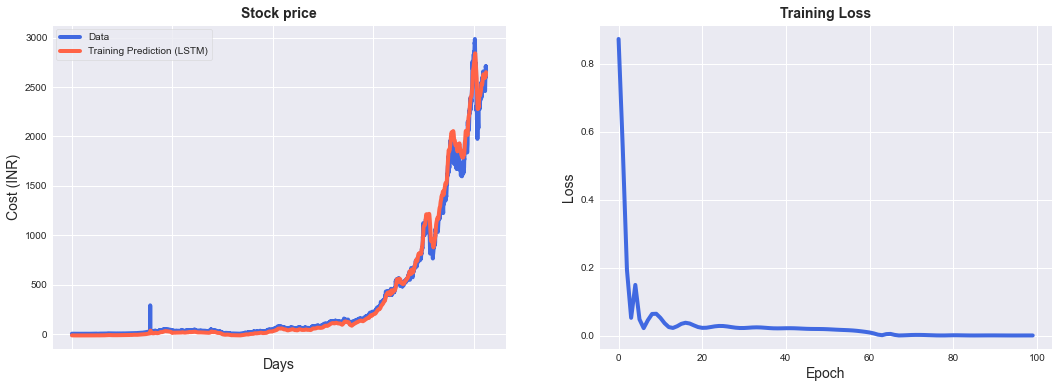

In [35]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (INR)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [37]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 50.16 RMSE
Test Score: 1843.15 RMSE


In [40]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(new_bajaj_finanace)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(new_bajaj_finanace)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(new_bajaj_finanace)-1, :] = y_test_pred

original = scaler.inverse_transform(new_bajaj_finanace['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [41]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (INR)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [42]:
import chart_studio.plotly as py
import chart_studio

chart_studio.tools.set_credentials_file(username='gianetan', api_key='crSiPMkyyMULdeULWUNC')
py.iplot(fig, filename='stock_prediction_lstm')

In [43]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [44]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [45]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.9613949060440063
Epoch  1 MSE:  0.39137002825737
Epoch  2 MSE:  0.059764862060546875
Epoch  3 MSE:  0.10664691030979156
Epoch  4 MSE:  0.1428733468055725
Epoch  5 MSE:  0.04703228920698166
Epoch  6 MSE:  0.01987365446984768
Epoch  7 MSE:  0.05334010720252991
Epoch  8 MSE:  0.07870906591415405
Epoch  9 MSE:  0.07193806767463684
Epoch  10 MSE:  0.046284087002277374
Epoch  11 MSE:  0.023280957713723183
Epoch  12 MSE:  0.017734674736857414
Epoch  13 MSE:  0.029066961258649826
Epoch  14 MSE:  0.041616883128881454
Epoch  15 MSE:  0.04147081822156906
Epoch  16 MSE:  0.030533336102962494
Epoch  17 MSE:  0.019681695848703384
Epoch  18 MSE:  0.016223283484578133
Epoch  19 MSE:  0.019724370911717415
Epoch  20 MSE:  0.02524089440703392
Epoch  21 MSE:  0.02807861752808094
Epoch  22 MSE:  0.026471976190805435
Epoch  23 MSE:  0.021755211055278778
Epoch  24 MSE:  0.016956403851509094
Epoch  25 MSE:  0.014780867844820023
Epoch  26 MSE:  0.01590324565768242
Epoch  27 MSE:  0.01858746260

In [46]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

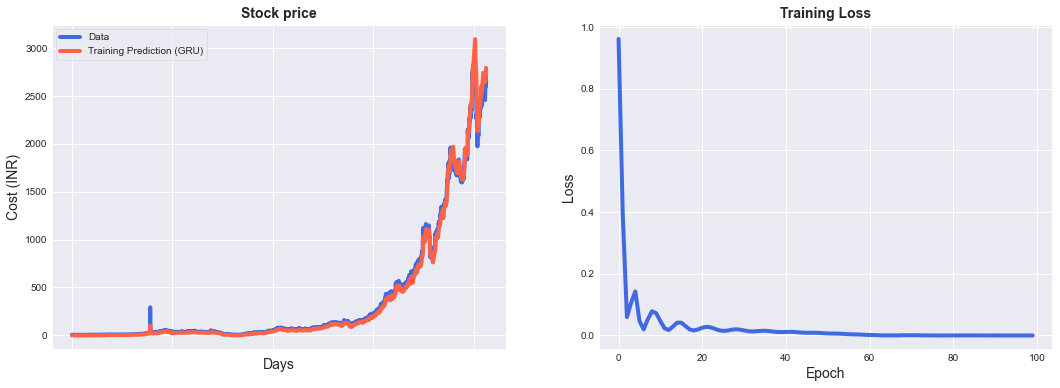

In [47]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (INR)", size = 14)
ax.set_xticklabels('', size=10)



plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [48]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 34.87 RMSE
Test Score: 318.42 RMSE


In [50]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(new_bajaj_finanace)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(new_bajaj_finanace)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(new_bajaj_finanace)-1, :] = y_test_pred

original = scaler.inverse_transform(new_bajaj_finanace['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)


In [51]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (INR)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (GRU)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [52]:
lstm = pd.DataFrame(lstm, columns=['LSTM'])
gru = pd.DataFrame(gru, columns=['GRU'])
result = pd.concat([lstm, gru], axis=1, join='inner')
result.index = ['Train RMSE', 'Test RMSE', 'Train Time']
result

,LSTM,GRU
Train RMSE,50.161001,34.870413
Test RMSE,1843.149072,318.423374
Train Time,79.983281,71.409146


In [53]:
py.iplot(fig, filename='stock_prediction_gru')